In [13]:
import logging
import ppx
import ann_solo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.INFO)
sns.set()

In [10]:
dataset = ppx.PXDataset("PXD013641")
files = [f for f in dataset.list_files() 
         if f.endswith(("splib", "mgf"))]
print(files)
lib, mgf = dataset.download(files, dest_dir="data")

['human_yeast_targetdecoy.splib', 'iPRG2012.mgf']


In [9]:
mztab = ann_solo.ann_solo(lib, mgf, mgf.replace("mgf", "mzTab"),
                          precursor_tolerance_mass=20,
                          precursor_tolerance_mode='ppm',
                          precursor_tolerance_mass_open=300,
                          precursor_tolerance_mode_open="Da",
                          fragment_mz_tolerance=0.02,
                          allow_peark_shifts=True,
                          remove_precursor=True)

INFO:root:Create the spectral library configuration for file data/human_yeast_targetdecoy.splib
Library spectra read: 1180172spectra [03:51, 5099.74spectra/s]
INFO:root:Build the spectral library ANN indexes               
INFO:root:Process file data/iPRG2012.mgf
INFO:root:4157 spectra identified after the standard search                         
INFO:root:Save identifications to file data/iPRG2012.mzTab


'data/iPRG2012.mzTab'

In [9]:
mztab = "data/iPRG2012.mzTab"
keep_cols = ["sequence",
             "charge",
             "accession", 
             "exp_mass_to_charge", 
             "calc_mass_to_charge"]

ssms = ann_solo.reader.read_mztab_ssms(mztab)[keep_cols]
ssms["mass_shift"] = (ssms.exp_mass_to_charge - ssms.calc_mass_to_charge) * ssms.charge
ssms.head()

,sequence,charge,accession,exp_mass_to_charge,calc_mass_to_charge,mass_shift
PSM_ID,,,,,,
26,YGSTNTRGDNEGQR,3,352476,518.902917,518.901234,0.005050
28,LQEEERER,2,413738,544.770339,544.770180,0.000318
34,FTDTRKDEQER,3,247372,475.562710,475.563671,-0.002883
51,ISKPQNFGEVQSR,3,301952,497.266962,497.263444,0.010556
66,SQGQINAARR,2,429328,550.798415,550.799607,-0.002384


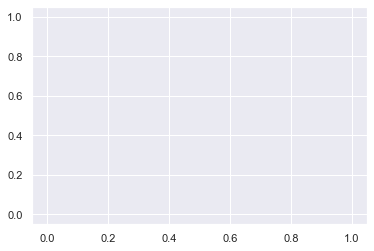

In [15]:
plt.figure()
plt.hist(ssms.mass_shift, bins=np.arange(ssms.mass_shift.min(), ssms.mass_shift.max(), 0.1))
plt.show()